In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Import Raw Data

In [141]:
path = r'D:\Users\hiltss\Github\Fantasy-Football'
df_gamelog = pd.read_csv(path+'\FF_League_History.csv', encoding='utf-8')

In [143]:
df_gamelog = df_gamelog.drop(['Week'],axis=1)

## Define columns

In [145]:
df_gamelog['W'] = np.where(df_gamelog['P1']>df_gamelog['P2'], 1,0)
df_gamelog['L'] = np.where(df_gamelog['P1']<df_gamelog['P2'], 1,0)
df_gamelog['T'] = np.where(df_gamelog['P1']==df_gamelog['P2'], 1,0)
df_gamelog['cumul_w'] = df_gamelog.groupby('Player')['W'].cumsum()
df_gamelog['cumul_t'] = df_gamelog.groupby('Player')['T'].cumsum()
df_gamelog['cumul_l'] = df_gamelog.groupby('Player')['L'].cumsum()
df_gamelog['cumul_wp'] = df_gamelog['cumul_w']/(df_gamelog['cumul_w']+df_gamelog['cumul_l'])
df_gamelog['cumul_games'] = df_gamelog['cumul_w']  + df_gamelog['cumul_t'] + df_gamelog['cumul_l'] 

In [203]:
df_gamelog.head(10)

,history_week,year_week,playoff_note,postseason,two_week_flag,dupe_reverse,Year,Player,Player.1,P1,P2,W,L,T,cumul_w,cumul_t,cumul_l,cumul_wp,cumul_games
0,1,1,0,0,0,0,2009,Stephen Joynt,Andrew Joynt,87,87,0,0,1,0,1,0,NaN,1
1,1,1,0,0,0,0,2009,mark silva,Karl Richardson,76,110,0,1,0,0,0,1,0.0,1
2,1,1,0,0,0,0,2009,Robert Hilton,Paulo Silva,43,108,0,1,0,0,0,1,0.0,1
3,1,1,0,0,0,0,2009,Dan Cohen,Stefan Hilts,60,104,0,1,0,0,0,1,0.0,1
4,1,1,0,0,0,0,2009,William Schager,chris tingle,108,109,0,1,0,0,0,1,0.0,1
5,1,1,0,0,0,1,2009,Andrew Joynt,Stephen Joynt,87,87,0,0,1,0,1,0,NaN,1
6,1,1,0,0,0,1,2009,Karl Richardson,mark silva,110,76,1,0,0,1,0,0,1.0,1
7,1,1,0,0,0,1,2009,Paulo Silva,Robert Hilton,108,43,1,0,0,1,0,0,1.0,1
8,1,1,0,0,0,1,2009,Stefan Hilts,Dan Cohen,104,60,1,0,0,1,0,0,1.0,1
9,1,1,0,0,0,1,2009,chris tingle,William Schager,109,108,1,0,0,1,0,0,1.0,1


### WP by Player

In [147]:
select_gamelog = df_gamelog.where(df_gamelog['Year']>=2009).dropna(subset=['Year'])
select_gamelog['early_late'] = np.where(select_gamelog['year_week']<11,'early','late')
#df_results = select_gamelog.groupby(['Player','Player.1']).agg('sum')
df_results = select_gamelog.groupby(['Player']).agg('last')
df_results['wp'] = (df_results['W'] / (df_results['W'] + df_results['L'] )).round(3)
df_results['total_games'] = df_results['W']  + df_results['T'] + df_results['L'] 
df_results['Points_for_pg'] = (df_results['P1']/df_results['total_games']).round(1)
df_results['Points_against_pg'] = (df_results['P2']/df_results['total_games']).round(1)
df_results['pt_diff'] = df_results['Points_for_pg']-df_results['Points_against_pg']

pd.set_option('display.max_rows', 500)
df_results = df_results.iloc[:,6:]
df_results


,Year,Player.1,P1,P2,W,L,T,cumul_w,cumul_t,cumul_l,cumul_wp,cumul_games,early_late,wp,total_games,Points_for_pg,Points_against_pg,pt_diff
Player,,,,,,,,,,,,,,,,,,
Andrew Joynt,2017,Rafesse,88,106,0,1,0,74,2,63,0.540146,139,late,0.0,1,88.0,106.0,-18.0
Brian Duffy,2015,Rafesse,48,74,0,1,0,21,3,38,0.355932,62,late,0.0,1,48.0,74.0,-26.0
Dan Cohen,2017,William Schager,100,72,1,0,0,74,0,65,0.532374,139,late,1.0,1,100.0,72.0,28.0
Emile Chin-Dickey,2017,Robert Hilton,68,51,1,0,0,49,1,73,0.401639,123,late,1.0,1,68.0,51.0,17.0
Greg Smith,2017,Paulo Silva,65,97,0,1,0,14,1,17,0.451613,32,late,0.0,1,65.0,97.0,-32.0
Karl Richardson,2017,mark silva,102,127,0,1,0,66,3,68,0.492537,137,late,0.0,1,102.0,127.0,-25.0
Paulo Silva,2017,Greg Smith,97,65,1,0,0,76,2,61,0.554745,139,late,1.0,1,97.0,65.0,32.0
Rafesse,2017,Andrew Joynt,106,88,1,0,0,26,1,36,0.419355,63,late,1.0,1,106.0,88.0,18.0
Robert Hilton,2017,Emile Chin-Dickey,51,68,0,1,0,37,0,41,0.474359,78,late,0.0,1,51.0,68.0,-17.0


### Running total win percentage by player

In [148]:
player_list = df_gamelog.groupby('Player')['Player'].agg('count').index
df_cumul_wp = pd.DataFrame()

for player in player_list:
    player_iter = player
    df_temp = df_gamelog.where(df_gamelog['Player']==player_iter)[['cumul_wp','cumul_games']].dropna().set_index('cumul_games').sort_index()
    #df_temp = df_gamelog.where(df_gamelog['Player']==player_iter)[['cumul_wp']].dropna().sort_index()
    df_cumul_wp = df_cumul_wp.join(df_temp, how='outer', rsuffix=player)

df_cumul_wp

,cumul_wp,cumul_wpBrian Duffy,cumul_wpDan Cohen,cumul_wpEmile Chin-Dickey,cumul_wpGreg Smith,cumul_wpKarl Richardson,cumul_wpPaulo Silva,cumul_wpRafesse,cumul_wpRobert Hilton,cumul_wpStefan Hilts,cumul_wpStephen Joynt,cumul_wpWilliam Schager,cumul_wpchris tingle,cumul_wpmark silva
cumul_games,,,,,,,,,,,,,,
1.0,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,NaN,0.000000,1.000000,0.000000
2.0,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.000000,0.500000,0.500000,0.500000
3.0,0.500000,0.333333,0.666667,0.000000,0.500000,0.666667,0.666667,0.333333,0.333333,0.666667,0.500000,0.333333,0.333333,0.333333
4.0,0.333333,0.500000,0.500000,0.000000,0.666667,0.500000,0.750000,0.500000,0.250000,0.750000,0.666667,0.500000,0.250000,0.500000
5.0,0.250000,0.400000,0.600000,0.000000,0.750000,0.600000,0.600000,0.400000,0.200000,0.800000,0.500000,0.600000,0.200000,0.600000
6.0,0.200000,0.333333,0.666667,0.000000,0.600000,0.500000,0.500000,0.500000,0.333333,0.833333,0.600000,0.500000,0.166667,0.666667
7.0,0.166667,0.285714,0.714286,0.166667,0.500000,0.571429,0.571429,0.571429,0.428571,0.857143,0.500000,0.428571,0.142857,0.571429
8.0,0.285714,0.250000,0.625000,0.142857,0.571429,0.625000,0.625000,0.500000,0.500000,0.750000,0.428571,0.500000,0.125000,0.500000
9.0,0.250000,0.222222,0.666667,0.250000,0.500000,0.666667,0.666667,0.555556,0.444444,0.777778,0.375000,0.444444,0.222222,0.444444


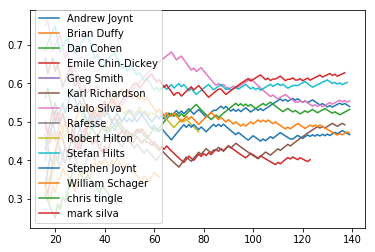

In [149]:
df_cumul_wp.columns = player_list
df_cumul_wp.iloc[15:]
lineObjects = plt.plot(df_cumul_wp.iloc[15:])
plt.legend(lineObjects, [x for x in player_list], loc='lower left')
#plt.legend(loc='lower left')
plt.show()






## Random Scheduling Module
1. Randomize the schedules by season to test who wins in a different setup
2. Run a bunch of seasons! 

#### 10-team first
- 10 teams
- 13 Regular-season games
- 4 playoff teams (no byes), 2 week playoffs


In [218]:
games_list = []
teams = np.arange(10)
for p1 in teams:
    for p2 in teams:
        if p1==p2:
            pass
        else:
            matchup=[p1,p2]
            games_list.append(matchup)
        

In [219]:
matchups=[]

for week in range(1,11):
    w_players = []
    games_list = [x for x in games_list if x not in matchups]
    for game in range(5):
        if game == 0:
            chosen = random.randint(0, len(games_list)-1)
            matchups.append(games_list[chosen])
            w_players.append(games_list[chosen][0])
            w_players.append(games_list[chosen][1])
            del games_list[chosen]
        else:
            week_opts = [x for x in games_list if x[0] not in set(w_players) and x[1] not in set(w_players)]
            if game ==4:
                chosen = 0
            else: 
                chosen = random.randint(0, len(week_opts)-1)
            
            matchups.append(week_opts[chosen])
            w_players.append(week_opts[chosen][0])
            w_players.append(week_opts[chosen][1])

#Fill last 3 weeks with first 3 weeks repeat
matchups[50:65] = matchups[0:15]    

In [214]:
df_season = df_gamelog.where(df_gamelog['Year']==2009).dropna(subset=['Year'])
df_season = df_season[['year_week','Player','P1']]
players_id = dict(enumerate(df_season.where(df_season['year_week']==1)['Player'].dropna().values))

In [215]:
players_id

{0: 'Stephen Joynt',
 1: 'mark silva',
 2: 'Robert Hilton',
 3: 'Dan Cohen',
 4: 'William Schager',
 5: 'Andrew Joynt',
 6: 'Karl Richardson',
 7: 'Paulo Silva',
 8: 'Stefan Hilts',
 9: 'chris tingle'}

In [220]:
for match in matchups:
    players_id.get(match[0])


'mark silva'